##  Titanic Survival Prediction
Step 1: Load and Explore Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
titanic = pd.read_csv("Titanic.csv")

# Explore
print(titanic.info())
print(titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB
None
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64


In [5]:

# Handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


<ipython-input-5-da724237a61c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Encode Categorical Variables:

Binary Encoding: Convert sex (male/female) and alone (True/False) to 0/1.

One-Hot Encoding: Convert embarked, class, and who into dummy variables.

In [6]:
# Convert binary features
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['alone'] = titanic['alone'].astype(int)

# One-hot encode categorical features
titanic = pd.get_dummies(titanic, columns=['embarked', 'class', 'who'], drop_first=True)

## Feature Engineering:

Create a family_size feature by combining sibsp (siblings/spouses) and parch (parents/children).

In [7]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)


## 2. Split Data into Features and Target

In [8]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

## 3. Train-Test Split

In [9]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
X_train

,sex,age,fare,alone,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,family_size
692,0,28.0,56.4958,1,False,True,False,True,True,False,0
481,0,28.0,0.0000,1,False,True,True,False,True,False,0
527,0,28.0,221.7792,1,False,True,False,False,True,False,0
855,1,18.0,9.3500,0,False,True,False,True,False,True,1
801,1,31.0,26.2500,0,False,True,True,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...
359,1,28.0,7.8792,1,True,False,False,True,False,True,0
258,1,35.0,512.3292,1,False,False,False,False,False,True,0
736,1,48.0,34.3750,0,False,True,False,True,False,True,4
462,0,47.0,38.5000,1,False,True,False,False,True,False,0


## 4. Model Training (Random Forest Classifier)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

## 5. Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       110
           1       0.83      0.64      0.72        69

    accuracy                           0.81       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.81      0.80       179


Confusion Matrix:
 [[101   9]
 [ 25  44]]


In [16]:
# 7. Sample Predictions
sample_data = X_test.head(3)
print("\nSample Predictions:")
for idx, (_, row) in enumerate(sample_data.iterrows()):
    actual = y_test.iloc[idx]
    pred = model.predict(pd.DataFrame(row).T)[0]
    proba = model.predict_proba(pd.DataFrame(row).T)[0][1]
    print(f"Sample {idx+1}:")
    print(f"  Actual: {'Survived' if actual == 1 else 'Died'}")
    print(f"  Predicted: {'Survived' if pred == 1 else 'Died'} (Probability: {proba:.2%})")
    print("  Features:")
    print(f"  - Sex: {'Female' if row['sex'] == 1 else 'Male'}")
    print(f"  - Age: {row['age']:.1f}")
    print(f"  - Fare: {row['fare']:.2f}")
    print(f"  - Class: {row['class_Third']}")  # Adjust based on actual columns
    print("-" * 40)



Sample Predictions:
Sample 1:
  Actual: Died
  Predicted: Died (Probability: 14.99%)
  Features:
  - Sex: Male
  - Age: 24.0
  - Fare: 24.15
  - Class: True
----------------------------------------
Sample 2:
  Actual: Died
  Predicted: Died (Probability: 12.76%)
  Features:
  - Sex: Male
  - Age: 44.0
  - Fare: 16.10
  - Class: True
----------------------------------------
Sample 3:
  Actual: Survived
  Predicted: Died (Probability: 10.92%)
  Features:
  - Sex: Male
  - Age: 22.0
  - Fare: 7.22
  - Class: True
----------------------------------------


## 6. Feature Importance


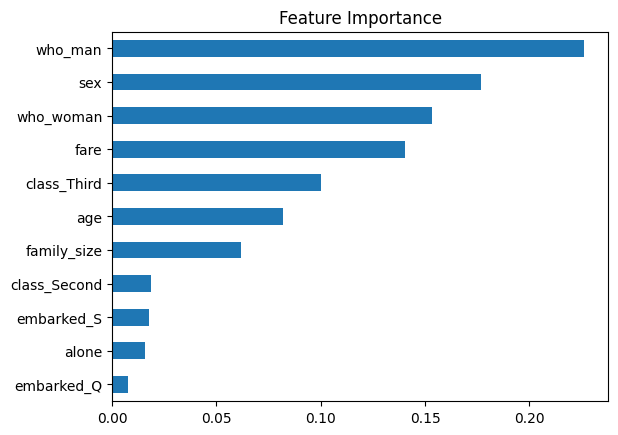

In [13]:

import matplotlib.pyplot as plt

# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

#  Build a model that classifies emails as spam or not spam using a dataset from Kaggle

In [17]:
df = pd.read_csv("spam_ham_dataset.csv")

In [19]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

data = pd.read_csv('spam_ham_dataset.csv')

print(data.head())

# Assuming the dataset has columns 'text' for email content and 'label' for spam (1) or not spam (0)


# Split the data into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, train_labels)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(test_labels, predictions))
print(classification_report(test_labels, predictions, target_names=['Not Spam', 'Spam']))

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
Accuracy: 0.9845410628019323
              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99       742
        Spam       0.97      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [21]:
print(classification_report(test_labels, predictions, target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99       742
        Spam       0.97      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

